<a href="https://colab.research.google.com/github/rsetaung/Misc/blob/main/Regression_Pa_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Grab the data that we need
R = pd.read_csv('/content/drive/MyDrive/Regression.csv')

In [4]:
R['Date'] = pd.to_datetime(R['Date'])

In [5]:
R = R.rename(columns={'Imports (USD mil)': 'Import'})
R = R.rename(columns={'FX (Kyat/USD)': 'FX'})

In [6]:
R = pd.DataFrame(R)

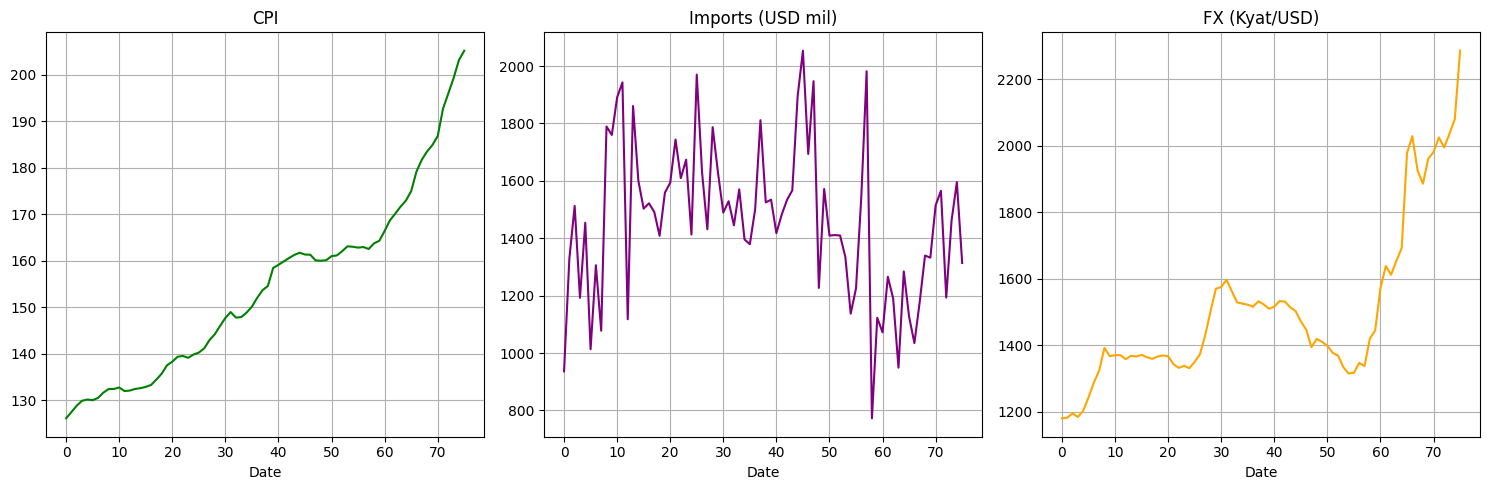

In [7]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Adjust figsize as needed

# Plot CPI with a title for the x-axis
R['CPI'].plot(ax=axes[0], color='g', grid=True)
axes[0].set_title('CPI')
axes[0].set_xlabel('Date')  # Set the x-axis title

# Plot Import with a title for the x-axis
R['Import'].plot(ax=axes[1], color='purple', grid=True)
axes[1].set_title('Imports (USD mil)')
axes[1].set_xlabel('Date')  # Set the x-axis title

# Plot FX with a title for the x-axis
R['FX'].plot(ax=axes[2], color='orange', grid=True)
axes[2].set_title('FX (Kyat/USD)')
axes[2].set_xlabel('Date')  # Set the x-axis title

# You can add more plots or customize further as needed

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [8]:
import numpy as np

# Log-transform the variables CPI, Import, and FX
R['CPI_log'] = np.log(R['CPI'])
R['Import_log'] = np.log(R['Import'])
R['FX_log'] = np.log(R['FX'])

### **OLS**

In [9]:
lm_CPI = smf.ols('CPI ~ Import + FX', data = R).fit()
lm_CPI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     105.1
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           3.22e-22
Time:                        01:43:02   Log-Likelihood:                -282.94
No. Observations:                  76   AIC:                             571.9
Df Residuals:                      73   BIC:                             578.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.6351     10.632      5.421      0.000      36.445      78.825
Import        -0.0053      0.004     -1.206      0.232      -0.014       0.003
FX             0.0694      0.005     14.085      0.000       0.060       0.079
==============================================================================
Omnibus:                        7.660   Durbin-Watson:                   0.157
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                5.526
Skew:                           0.529   Prob(JB):                       0.0631
Kurtosis:                       2.208   Cond. No.                     1.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
from statsmodels.compat import lzip
name = ['BP', 'p-value',
        'f-value', 'f p-value']

# use results of the model we fitted earlier
test = sm.stats.diagnostic.het_breuschpagan(lm_CPI.resid, lm_CPI.model.exog)
lzip(name, test)

[('BP', 4.168423590876447),
 ('p-value', 0.12440513822902301),
 ('f-value', 2.118113908574415),
 ('f p-value', 0.12758978082248895)]

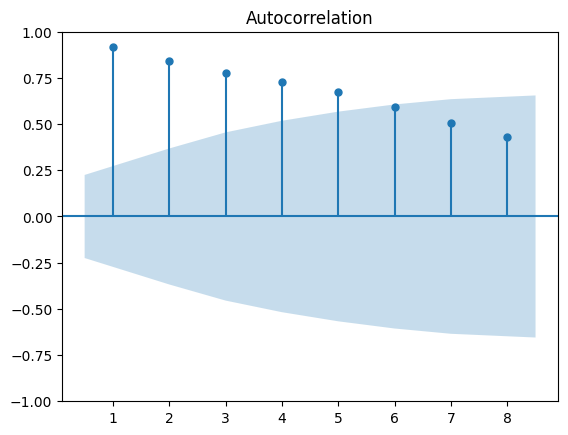

In [11]:
err = lm_CPI.resid

from statsmodels.tsa.stattools import acf

acf(err)

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(err, lags = 8, zero = False);

In [12]:
# Install R
!apt-get update -qq
!apt-get install -y r-base

# Install R packages that are required for rpy2
!apt-get install -y libssl-dev libcurl4-openssl-dev libxml2-dev

# Install rpy2 for Python-R integration
!pip install rpy2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.3.1-4.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcurl4-openssl-dev is already the newest version (7.81.0-1ubuntu1.13).
libssl-dev is already the newest version (3.0.2-0ubuntu1.10).
libxml2-dev is already the newest version (2.9.13+dfsg-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [13]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

In [16]:
%%capture
%load_ext rpy2.ipython


In [17]:
%%R

install.packages("car")
install.packages("stats")

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpdcq4k7/downloaded_packages’

(as ‘lib’ is unspecified)



In [18]:
%%R -i R

# Fit the linear regression model
lm_CPI_r <- lm(CPI ~ Import + FX, data = R)

# Perform the Durbin-Watson test
library(car)
durbinWatsonTest(lm_CPI_r, max.lag = 3)


/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():



 lag Autocorrelation D-W Statistic p-value
   1       0.9156576     0.1569249       0
   2       0.8426590     0.2872679       0
   3       0.7776864     0.4068002       0
 Alternative hypothesis: rho[lag] != 0


### **OLS Logged**

In [19]:
lm_CPI_log = smf.ols('CPI_log ~ Import_log + FX_log', data = R).fit()
lm_CPI_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CPI_log   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     94.24
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           5.96e-21
Time:                        02:40:32   Log-Likelihood:                 98.854
No. Observations:                  76   AIC:                            -191.7
Df Residuals:                      73   BIC:                            -184.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3257      0.509      0.640      0.524      -0.689       1.340
Import_log    -0.0580      0.040     -1.434      0.156      -0.138       0.023
FX_log         0.7018      0.052     13.391      0.000       0.597       0.806
==============================================================================
Omnibus:                        5.871   Durbin-Watson:                   0.144
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.226
Skew:                           0.561   Prob(JB):                       0.0733
Kurtosis:                       2.375   Cond. No.                         687.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
from statsmodels.compat import lzip
name = ['BP', 'p-value',
        'f-value', 'f p-value']

# use results of the model we fitted earlier
test = sm.stats.diagnostic.het_breuschpagan(lm_CPI_log.resid, lm_CPI_log.model.exog)
lzip(name, test)

[('BP', 5.990762863467609),
 ('p-value', 0.0500175451686188),
 ('f-value', 3.1233427681854367),
 ('f p-value', 0.04994292645109406)]

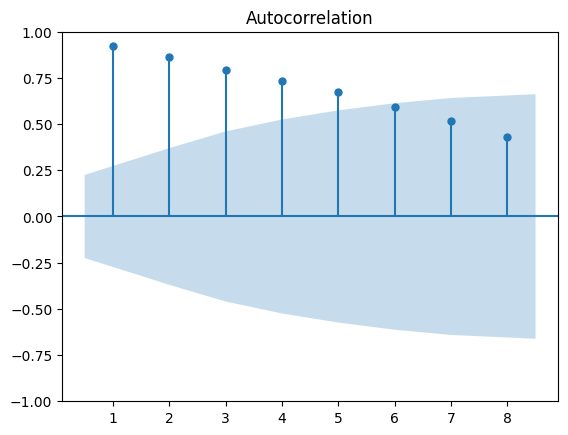

In [21]:
err = lm_CPI_log.resid

from statsmodels.tsa.stattools import acf

acf(err)

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(err, lags = 8, zero = False);

In [23]:
%%R -i R

# Fit the linear regression model
lm_CPI_log_r <- lm(CPI_log ~ Import_log + FX_log, data = R)

# Perform the Durbin-Watson test
library(car)
durbinWatsonTest(lm_CPI_log_r, max.lag = 3)


 lag Autocorrelation D-W Statistic p-value
   1       0.9226909     0.1443587       0
   2       0.8617047     0.2554521       0
   3       0.7941033     0.3839024       0
 Alternative hypothesis: rho[lag] != 0


/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


For all lags (1, 2, and 3), the autocorrelation coefficients are relatively high, indicating a positive correlation between the residuals at each lag.

The D-W statistics are all significantly lower than 2 (e.g., 0.1443587, 0.2554521, and 0.3839024), suggesting the presence of positive autocorrelation in the residuals.

The p-values associated with each lag are all very close to 0 (p < 0.05), indicating that the positive autocorrelation is statistically significant.

In summary, the results suggest that there is positive autocorrelation in the residuals of your regression model at lags 1, 2, and 3, so residuals are not independent and exhibit a certain degree of correlation with each other at these lags. We could consider addressing this autocorrelation issue using ARIMA similar to what I did for my thesis..

### **ARIMA**

In [24]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.3 MB/s eta 0:00:00


In [25]:
from pmdarima import auto_arima

auto_arima(lm_CPI_log.resid, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-327.835, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-335.309, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-333.598, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-333.569, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-337.272, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-331.502, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.218 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [26]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima_CPI_log = SARIMAX(R['CPI_log'], order=(0, 1, 0), exog=R[['Import_log', 'FX_log']]).fit()
arima_CPI_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                CPI_log   No. Observations:                   76
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 249.456
Date:                Wed, 04 Oct 2023   AIC                           -492.912
Time:                        02:49:20   BIC                           -485.959
Sample:                             0   HQIC                          -490.136
                                 - 76                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Import_log     0.0022      0.007      0.295      0.768      -0.012       0.017
FX_log         0.1208      0.038      3.206      0.001       0.047       0.195
sigma2      7.552e-05   9.41e-06      8.022      0.000    5.71e-05     9.4e-05
===================================================================================
Ljung-Box (L1) (Q):                  12.34   Jarque-Bera (JB):                19.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.50   Skew:                             1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

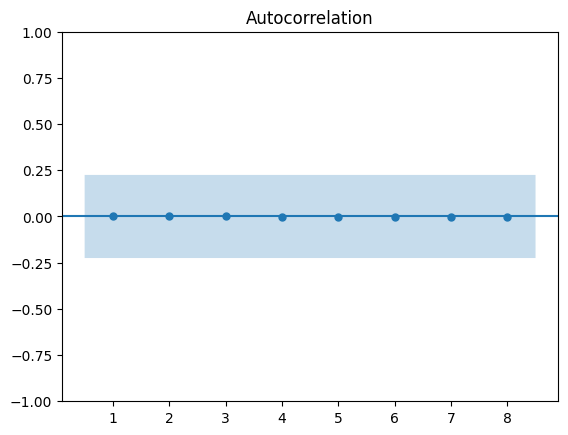

In [27]:
err = arima_CPI_log.resid

from statsmodels.tsa.stattools import acf

acf(err)

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(err, lags = 8, zero = False);

In [28]:
from patsy import dmatrices

from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('CPI_log ~ Import_log + FX_log',
                 data = R, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,4357.853213,Intercept
1,1.013911,Import_log
2,1.013911,FX_log


<Figure size 1000x600 with 0 Axes>

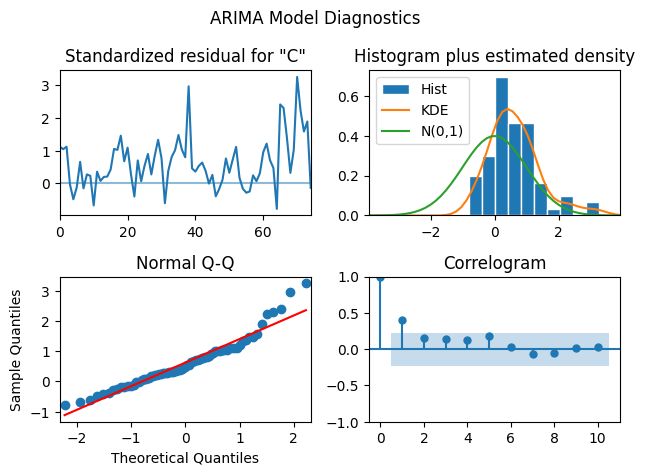

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMAX models
models = [SARIMAX(R['CPI_log'], order=(0, 1, 0), exog=R[['Import_log', 'FX_log']])]

# Fit the models
results = [model.fit() for model in models]

# Create three separate figures for diagnostics plots
for i, result in enumerate(results):
    plt.figure(figsize=(10, 6))
    result.plot_diagnostics()
    plt.suptitle("ARIMA Model Diagnostics")
    plt.tight_layout()

# Show the plots
plt.show()

The ARIMA model had a good pattern for normal distribution against the KDE and the distribution from the Normal Q-Q plot also looked quite nice with little deviations, but the correlogram does show some positive autocorrelation especially at lags 0 and 1.

In [ ]:
!apt-get install -y texlive-xetex

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-extra texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framewor

In [ ]:
!wget https://raw.githubusercontent.com/rsetaung/Misc/main/Regression_Pa.ipynb
!jupyter nbconvert --to latex Regression.ipynb

In [ ]:
pdflatex Regression.tex

In [ ]:
!ls

In [ ]:
from google.colab import files

files.download("Regression .pdf")